In [20]:
import pmcx
import numpy as np
import matplotlib.pyplot as plt
import math

# print gpus
pmcx.gpuinfo()
gpus=pmcx.gpuinfo()

# method 1: define a simple simulation using a dict
d = 10
cfg={}
cfg['nphoton']=5e7
cfg['vol']=np.ones([100,100,50], dtype='double')
cfg['vol'][:,:,d:50]=2
cfg['tstart']=0
cfg['tend']=5e-9
cfg['tstep']=1e-10
cfg['srcpos']=[50,50,0]
cfg['srcdir']=[0,0,1]
cfg['prop']=[[0,0,1,1],[0.02,10,0.9,1.4],[0.004,0.01,0.9,1.4]]

# run the simulation
res=pmcx.run(cfg)

nphoton: 5e+07
tstart: 0
tstep: 1e-10
tend: 5e-09
srcpos: [50, 50, 0, 1]
srcdir: [0, 0, 1, 0]
=============================   GPU Information  ================================
Device 1 of 1:		Quadro RTX 6000
Compute Capability:	7.5
Global Memory:		25396838400 B
Constant Memory:	65536 B
Shared Memory:		49152 B
Registers:		65536
Clock Speed:		1.77 GHz
Number of SMs:		72
Number of Cores:	4608
Auto-thread:		147456
Auto-block:		64
=============================   GPU Information  ================================
Device 1 of 1:		Quadro RTX 6000
Compute Capability:	7.5
Global Memory:		25396838400 B
Constant Memory:	65536 B
Shared Memory:		49152 B
Registers:		65536
Clock Speed:		1.77 GHz
Number of SMs:		72
Number of Cores:	4608
Auto-thread:		147456
Auto-block:		64
###############################################################################
#                      Monte Carlo eXtreme (MCX) -- CUDA                      #
#          Copyright (c) 2009-2023 Qianqian Fang <q.fang at neu.edu>      

In [31]:
# Make frequency domain Green's functions
freq = 1.41e8
if freq == 0: 
    fluence = np.sum(res['flux']*cfg['tstep'],axis=3)
else:
    omega = 2*math.pi*freq
    dim = np.shape(res['flux'])
    fluence = np.zeros([dim[0],dim[1],dim[2]], dtype='complex')
    rea = np.cos(omega*np.arange(0,dim[3],1)*cfg['tstep'])
    ima = 1j*np.sin(omega*np.arange(0,dim[3],1)*cfg['tstep'])
    for i in range(0,dim[0]):
        for j in range(0,dim[1]):
            for k in range(0,dim[2]):
                fluence[i,j,k] = np.sum(res['flux'][i,j,k,:]*cfg['tstep']*rea+res['flux'][i,j,k,:]*cfg['tstep']*ima)

Gi = np.absolute(fluence)
Gp = np.angle(fluence)

idx = np.zeros([dim[0]*dim[1],2],dtype='int')
for i in range(0,np.shape(idx)[0]):
    idx[i,:] = np.unravel_index(i,[dim[0],dim[1]], order='C')

rsd = np.zeros([dim[0]*dim[1],1],dtype='double')
for i in range(0,np.shape(idx)[0]):
    rsd[i] = math.dist(idx[i,:],[50,50])  
Gi.shape
 

(100, 100, 50)

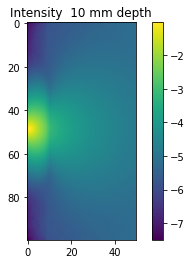

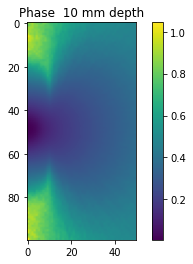

In [23]:
# visualize the Green's function
plt.imshow(np.log10(Gi[50,:,:]))
plt.title('Intensity  ' + str(d) +'mm depth')
plt.colorbar()
plt.show()

plt.imshow(Gp[50,:,:])
plt.title('Phase  ' + str(d) +'mm depth')
plt.colorbar()
plt.show()

Text(0, 0.5, 'phase  (rad)')

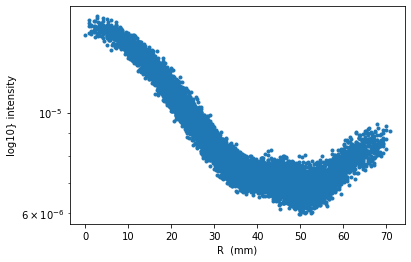

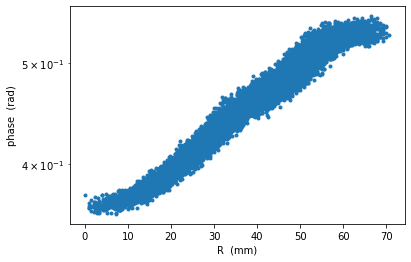

In [45]:
# plot the Green's functions vs Rsd
Gii = np.reshape(Gi,[dim[0]*dim[1],dim[2]])
Gpp = np.reshape(Gp,[dim[0]*dim[1],dim[2]])

plt.figure()
plt.semilogy(rsd,Gii[:,49],'.')
plt.xlabel('R  (mm)')
plt.ylabel('log10} intensity')

plt.figure()
plt.semilogy(rsd,Gpp[:,49],'.')
plt.xlabel('R  (mm)')
plt.ylabel('phase  (rad)')